In [196]:
# задание 1 -Определите распределение зарплат в компании Тинькофф по сведениям сайта hh:
# https://github.com/dm-fedorov/pandas_basic/blob/master/data/tinkoff_hh.json

import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

with open("tinkoff_hh.json", encoding='utf-8') as file:
     reader = file.readlines()
line = reader[1::2]
df = pd.DataFrame([json.loads(i) for i in line])

def to_value(row):
    temp = ''
    for i in row['income']:
        if i == 'д':
            break
        elif i.isdigit():
            temp += i
    if temp == '':
        temp = 0
    return int(temp)
    
df['income'] = df.apply(to_value, axis=1)
incomes = df.groupby(['vacancy'])['income'].sum().sort_values(ascending=False)
print(incomes)

vacancy
Агент по доставке продуктов Тинькофф                           8850000
Менеджер по привлечению юридических лиц                        7200000
Представитель Тинькофф                                         5879000
Специалист по развитию агентской сети                          3960000
Территориальный руководитель по привлечению юридических лиц    3680000
                                                                ...   
Младший специалист кадрового делопроизводства                        0
Младший системный аналитик                                           0
Младший разработчик Java                                             0
Младший бизнес-аналитик Weboffice                                    0
Android developer ( Mobile bank)                                     0
Name: income, Length: 429, dtype: int64


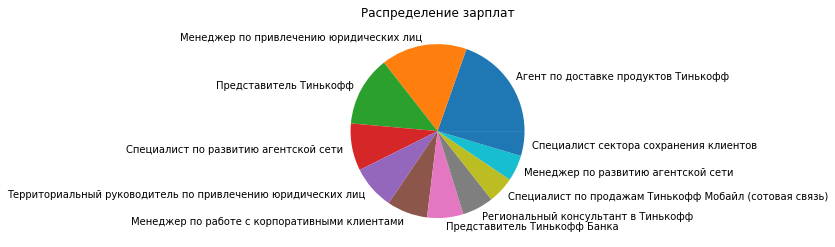

In [208]:
plt.title('Распределение зарплат')
n = 2000000
plt.pie([i for i in incomes if i > n], labels = [i for i in incomes.index if incomes[i] > n])
plt.show()
# при иозменение n можно отобрать наиболее затратные проффессии (самый красивый 'пирог' при 2000000)

In [243]:
# задание 2 - Заказчик попросил провести анализ частоты запросов к сайту по версии

import pymorphy2
import numpy as np
import pandas as pd

morph = pymorphy2.MorphAnalyzer()

url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/data/data_stat/yandex-stat-q.csv"

df = pd.read_csv(url)
df.head()

temp = morph.parse('думающему')[0].normal_form

phrases = {}
for i in df['Поисковая фраза']:
    for j in i.split(' '):
        word = morph.parse(j)[0].normal_form
        phrases.setdefault(word,0)
        phrases[word] += 1

In [249]:
table = pd.DataFrame(np.array(list(zip(phrases.keys(), phrases.values()))),
                  columns=['Слово', 'Количество упомянаний'])
def to_int(row):
    return int(row['Количество упомянаний'])

table['Количество упомянаний'] = table.apply(to_int, axis=1)
table.sort_values(['Количество упомянаний'], ascending=False).reset_index() 

,index,Слово,Количество упомянаний
0,14,тезис,6848
1,52,в,6048
2,20,на,4974
3,21,конференция,4726
4,124,по,4234
...,...,...,...
16953,8197,однозначный,1
16954,8198,"вопрос,",1
16955,8199,"ответов,",1
16956,8200,соперничать,1
